In [ ]:
!pip install matchms
!pip install rdkit
!pip install torch_geometric
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 10.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 47.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 12.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910476 sha256=6d370615b8c3b18a09d68a047ad68db5bb59d7bb6437aed856921cb963266510
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dc

In [ ]:
from matchms.importing import load_from_msp
import numpy as np
import os
import random
import pickle
from rdkit import Chem
from rdkit.Chem import Descriptors
import matchms
from matchms import Spectrum

import matplotlib.pyplot as plt
import warnings

from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# Pytorch and Pytorch Geometric
import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader

import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, GATConv
from torch_geometric.nn import global_mean_pool as gap
import torch.nn as nn
from torch_geometric.data import DataLoader
from torch.optim.lr_scheduler import StepLR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/NIST_LIB/model_base_big.py model_base_big.py
!cp /content/drive/MyDrive/NIST_LIB/validation_metrics.py validation_metrics.py

In [ ]:
import model_base_big
import validation_metrics

In [ ]:
with open("/content/drive/MyDrive/NIST_SMALL/Preprocessed_test_log_preparation_no_sparse_small.output", 'rb') as handle:
    data_list_test  = pickle.load(handle)

In [ ]:
REGEX = "*.pt"
PATH_MODELS = "/content/drive/MyDrive/NIST_SMALL/GATTED_GAT_BIG"
BATCH = 64
MAX_INTENSITY = 999.

In [ ]:

matchms.set_matchms_logger_level("ERROR")

In [ ]:
with open("/content/drive/MyDrive/NIST_SMALL/validation_subset_log.pkl", 'rb') as handle:
    data_list_validation  = pickle.load(handle)

In [ ]:
validation_loader_unshuffled = DataLoader(data_list_validation, 
                         batch_size=BATCH, shuffle=False)
kernel_size = 4
number_of_gates = 2
number_of_channels = 1
heads = 4
MODEL_CLASS = model_base_big.GATTED_GAT_BIG(kernel_size, number_of_gates, number_of_channels, heads)
models_path = validation_metrics.load_each_model(PATH_MODELS, REGEX)

validation_metrics.load_models_and_predict(models_path, PATH_MODELS, MODEL_CLASS, validation_loader_unshuffled)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
REGEX_VALIDATION = r'^validation\d+\.pkl$'
validation_paths = validation_metrics.find_validation_files(PATH_MODELS, REGEX_VALIDATION)
statistics_validation = validation_metrics.compute_statistics_for_validation(validation_paths)

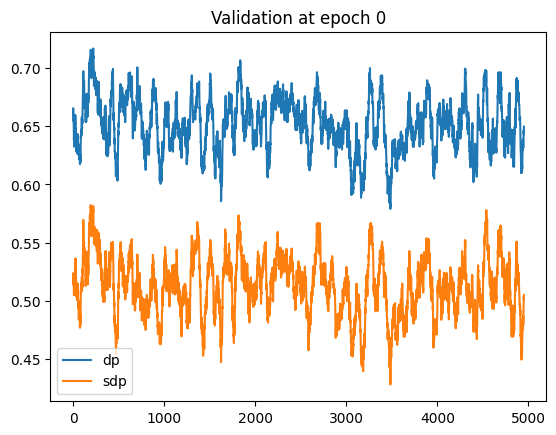

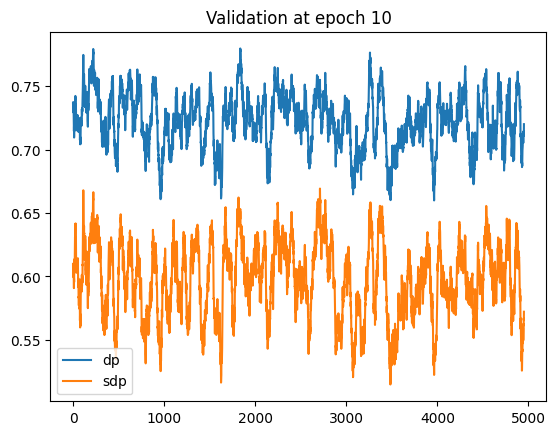

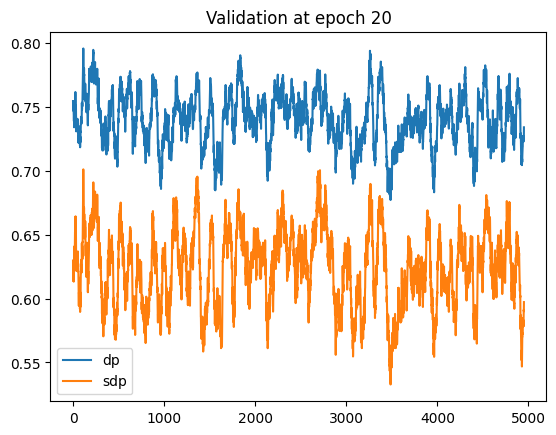

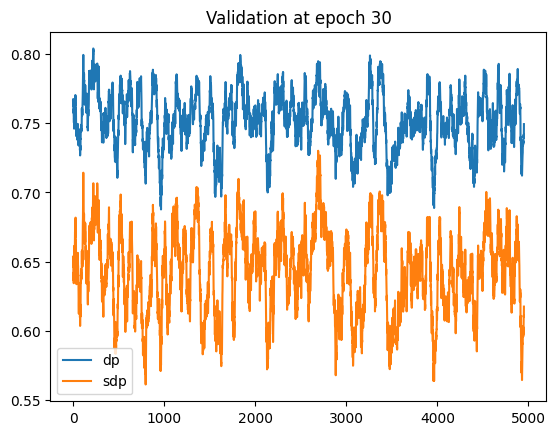

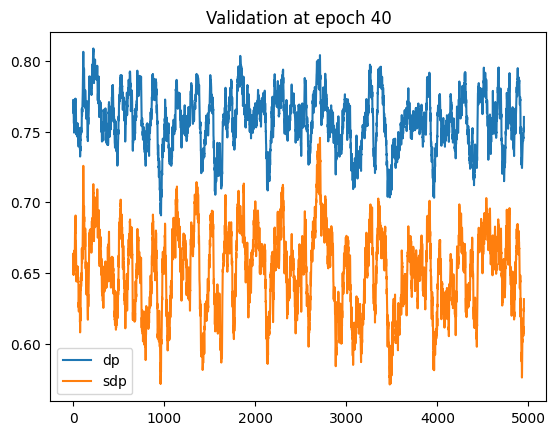

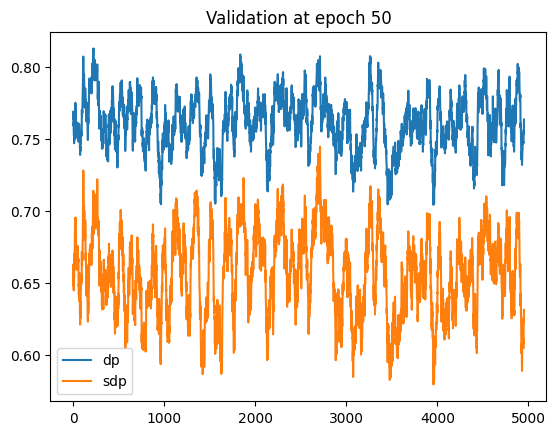

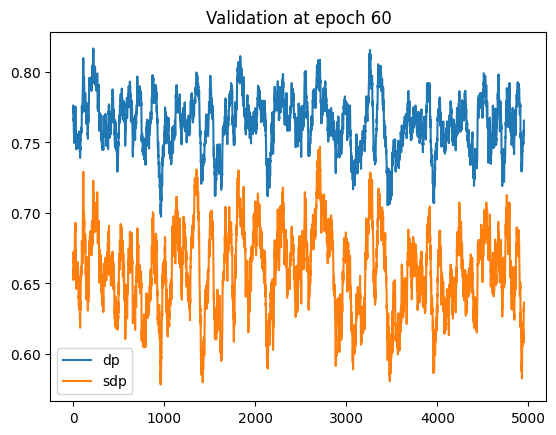

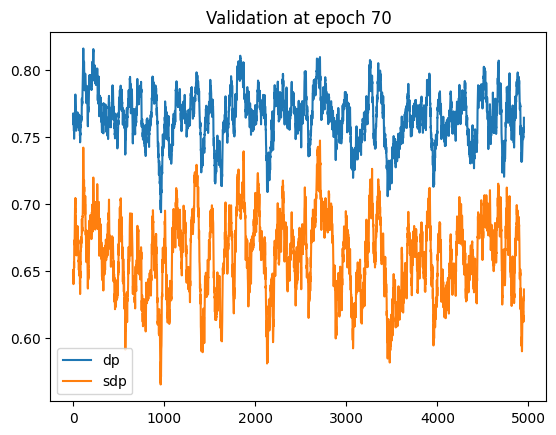

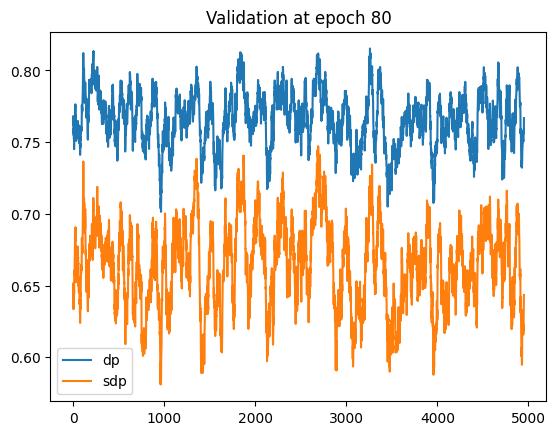

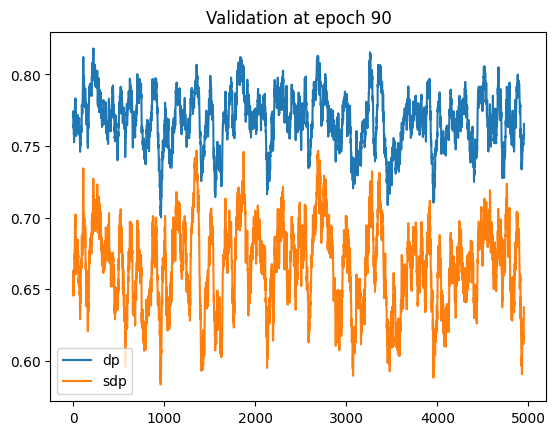

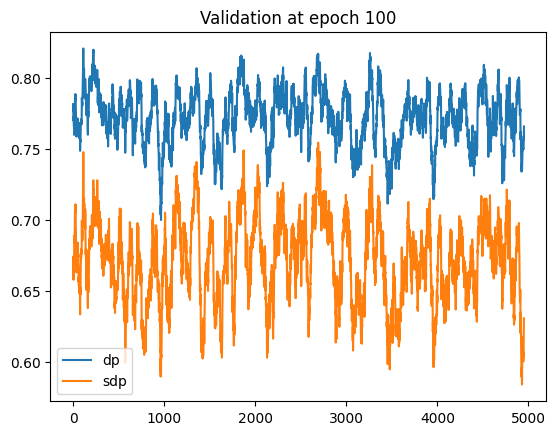

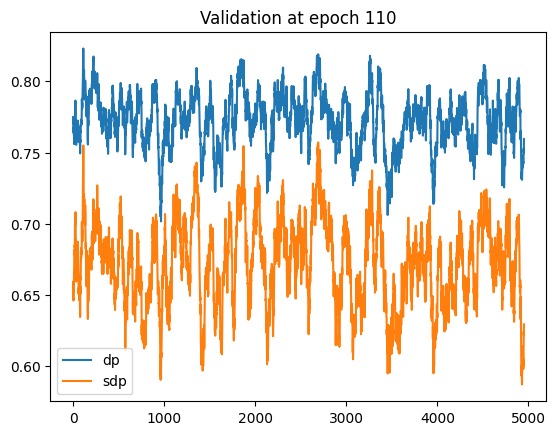

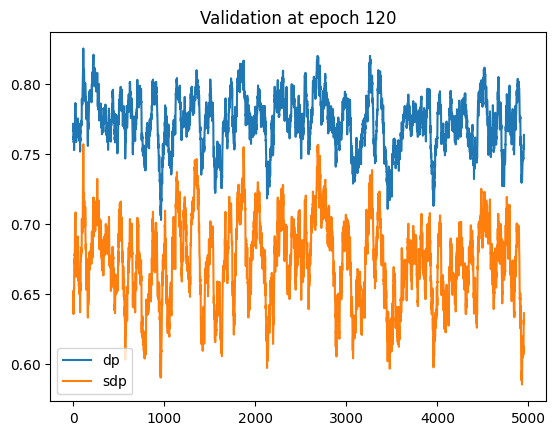

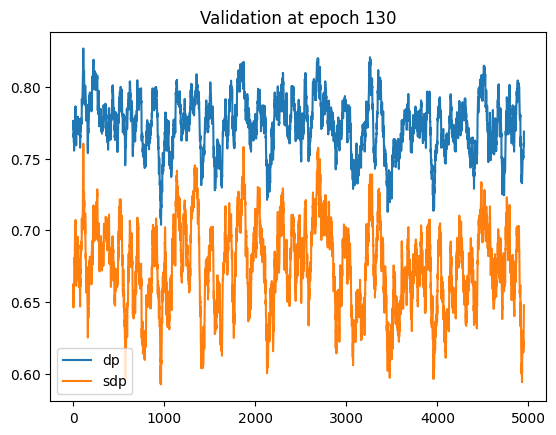

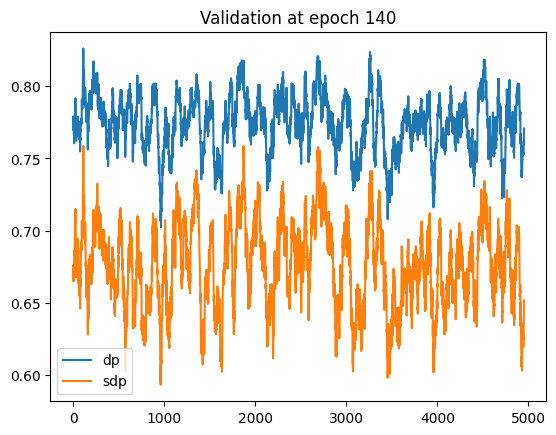

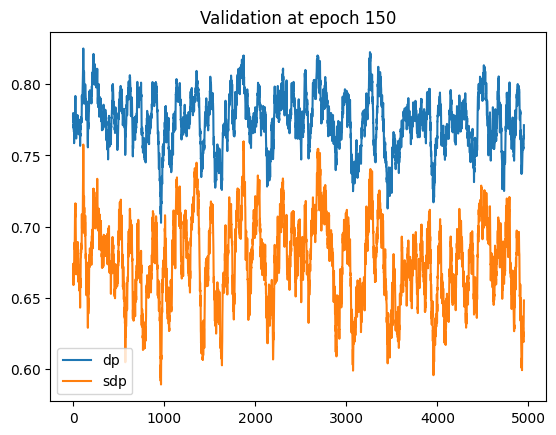

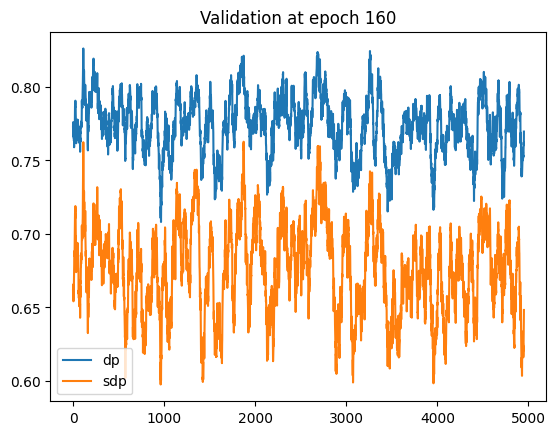

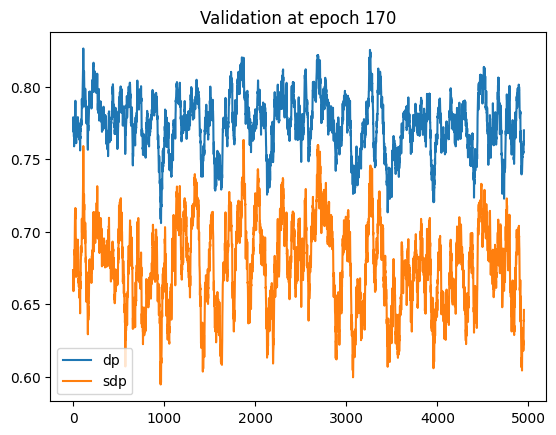

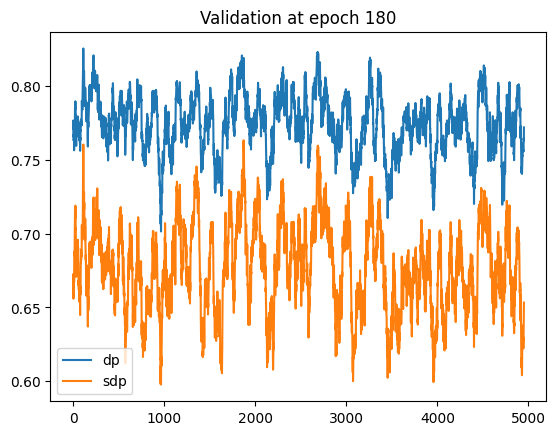

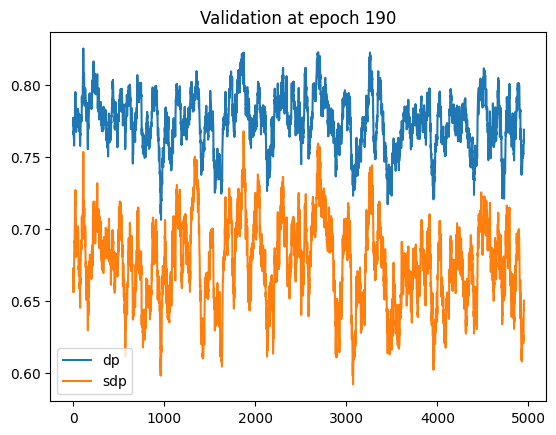

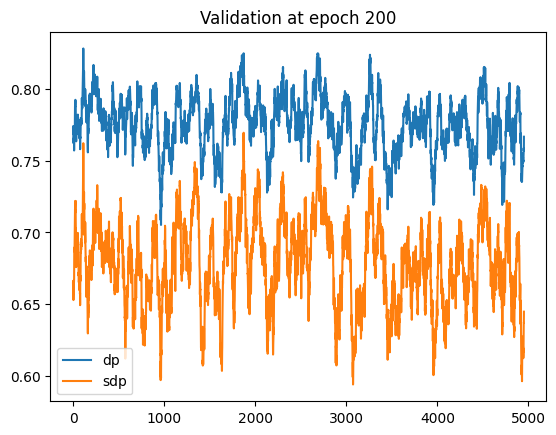

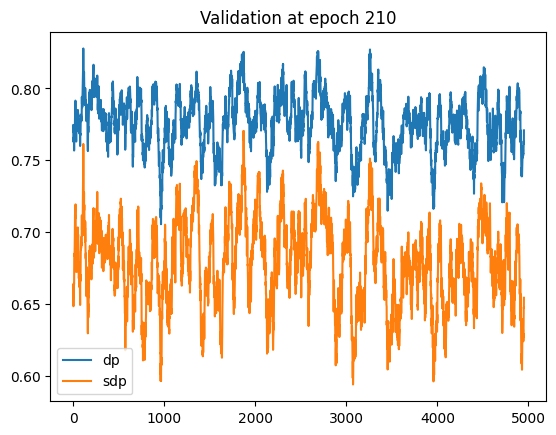

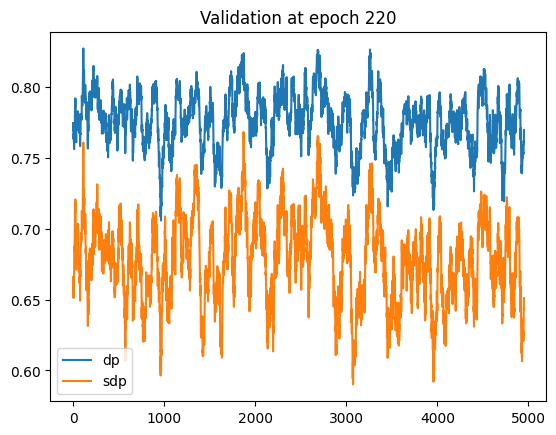

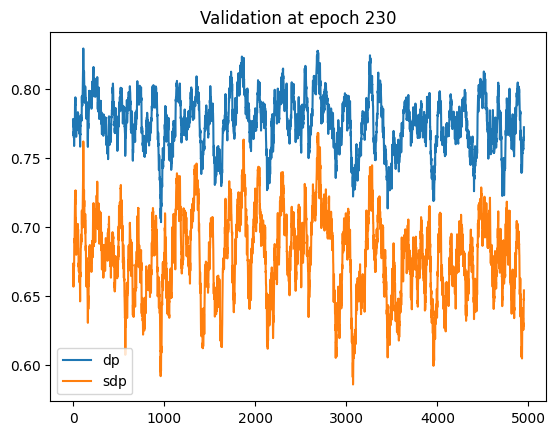

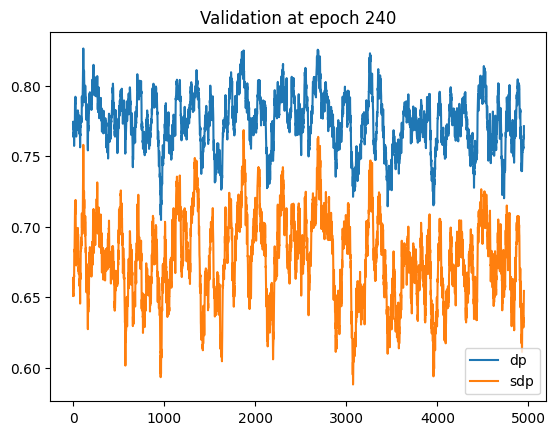

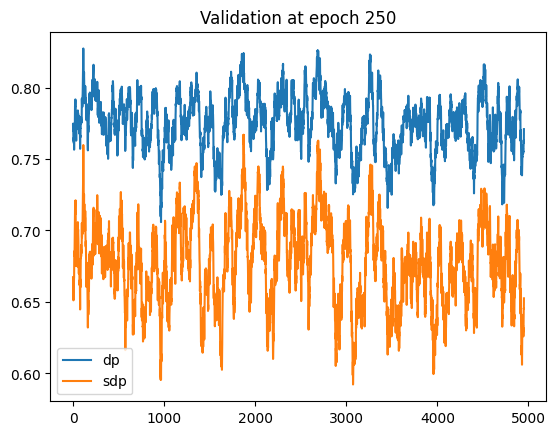

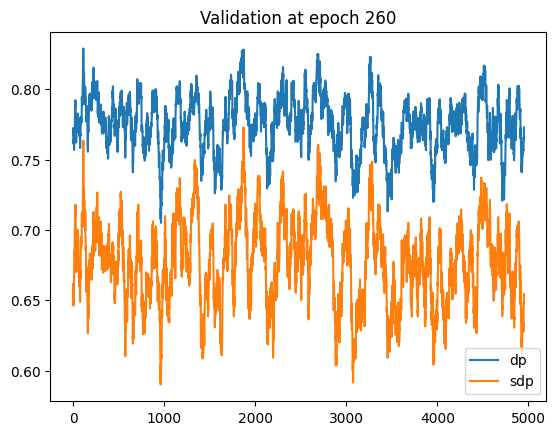

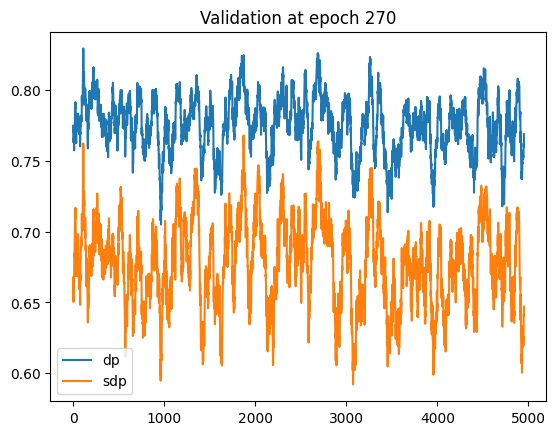

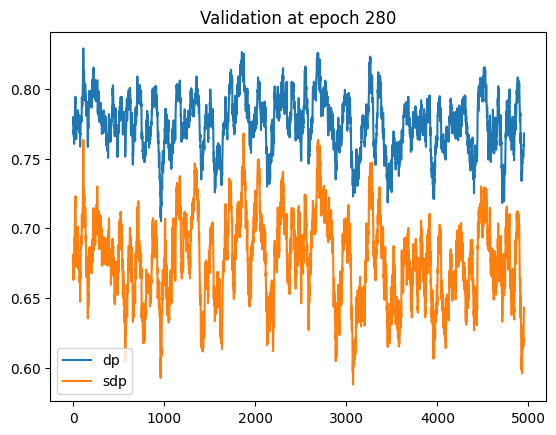

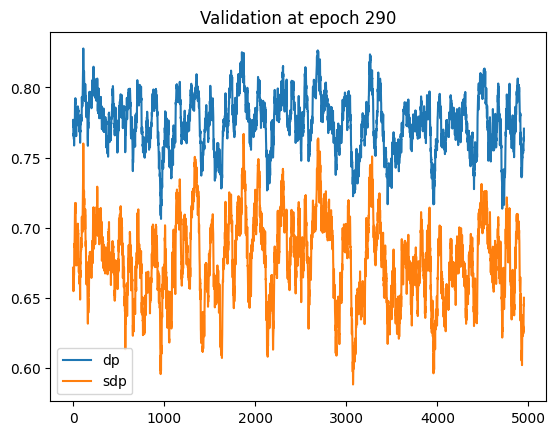

In [ ]:
validation_metrics.plot_convolve_mean(statistics_validation)

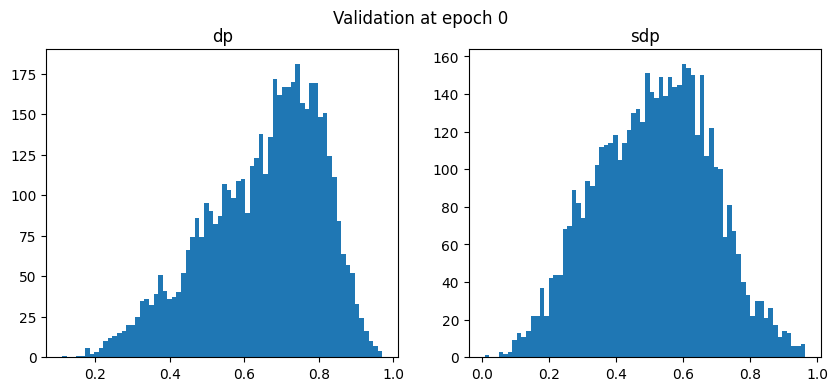

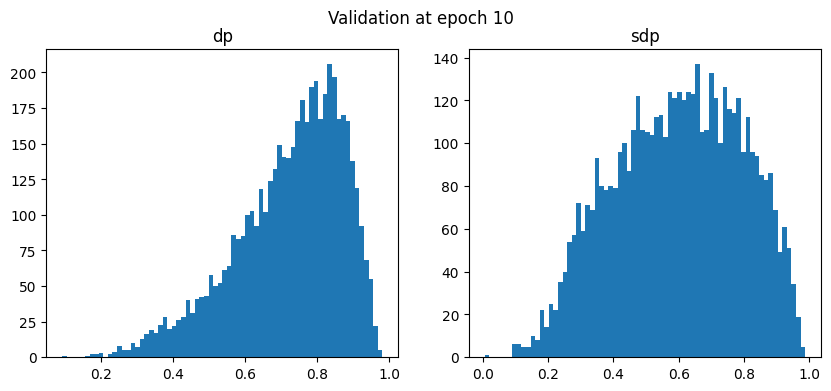

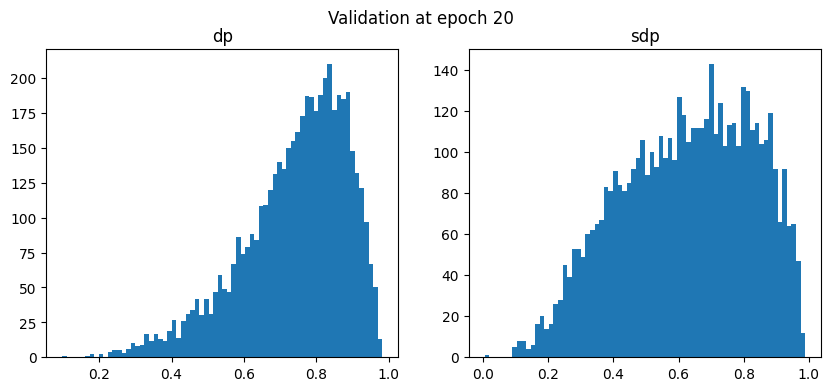

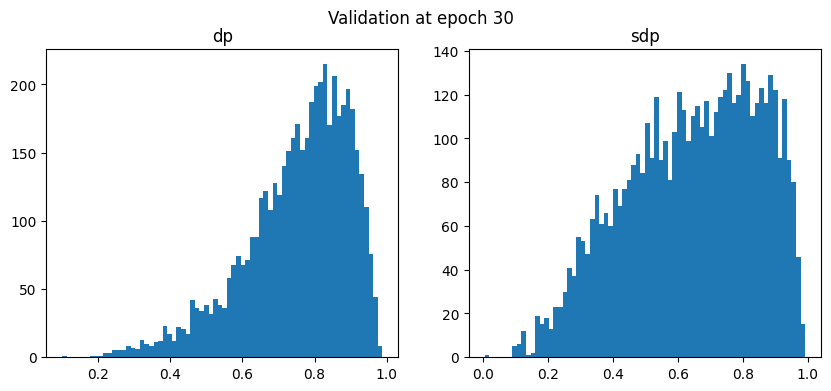

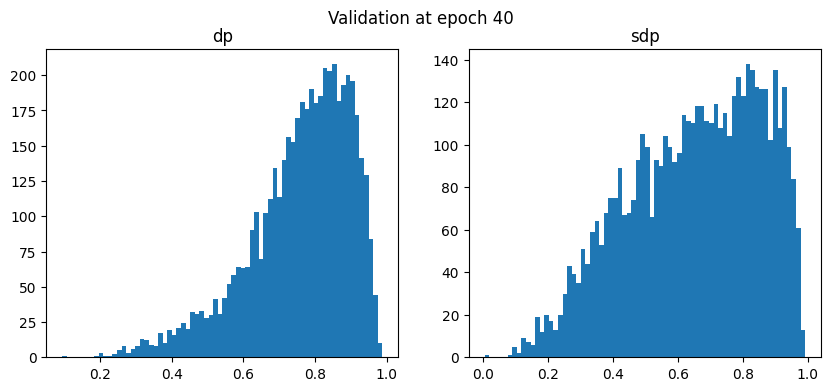

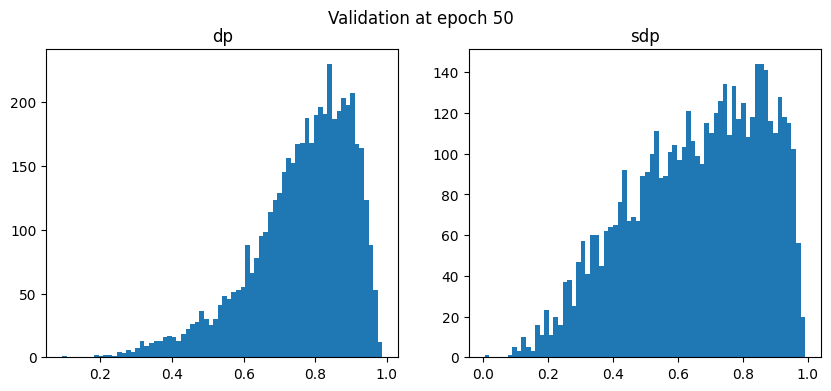

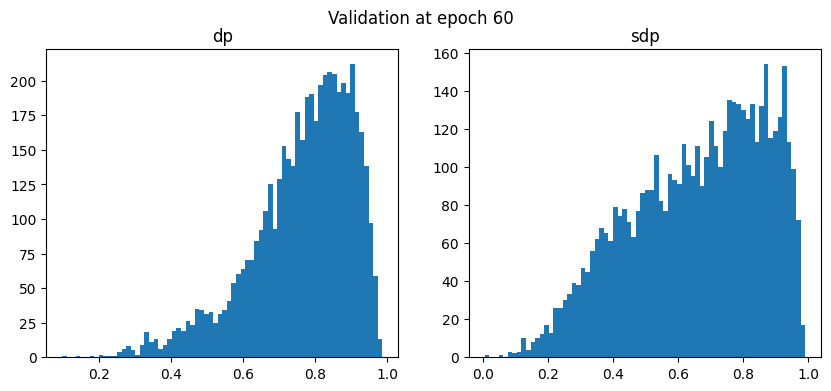

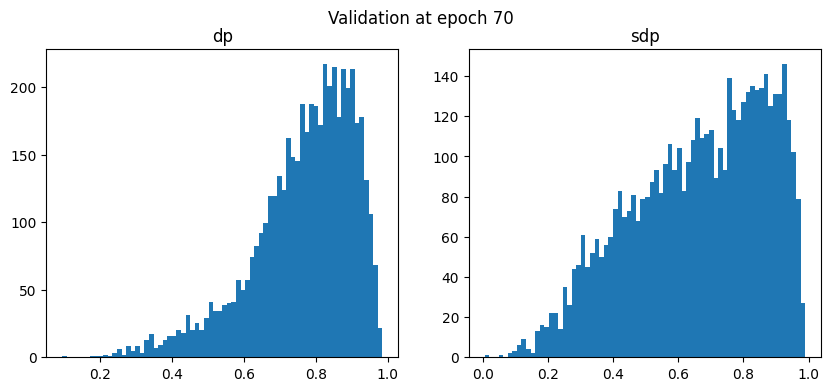

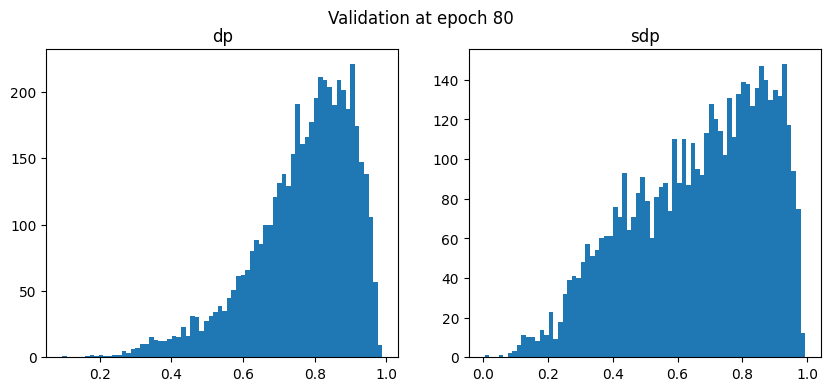

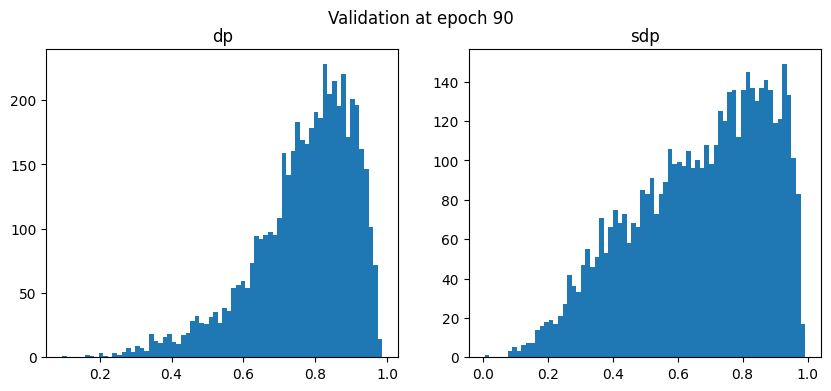

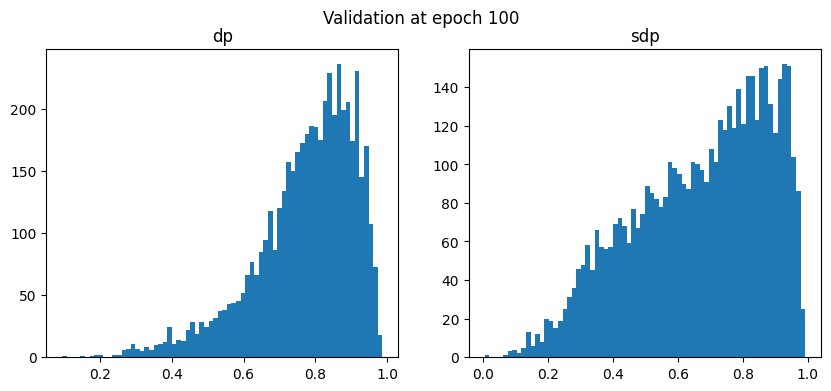

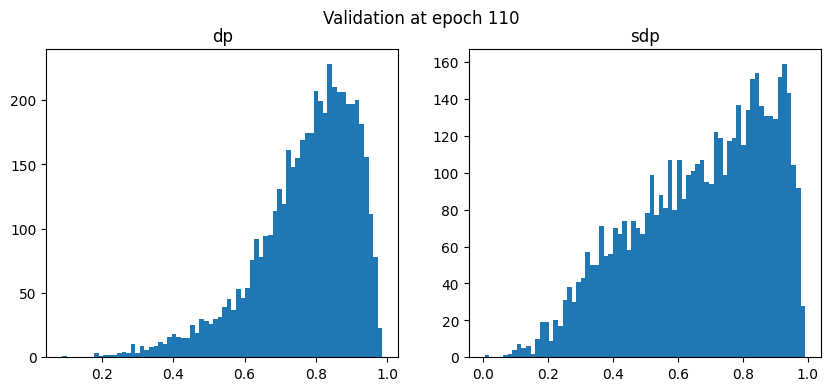

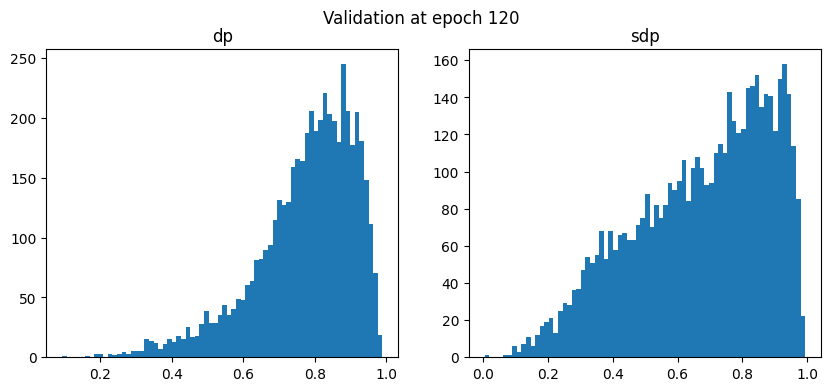

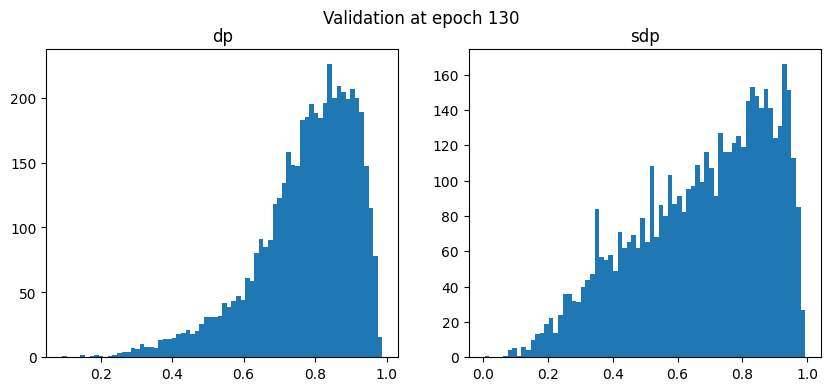

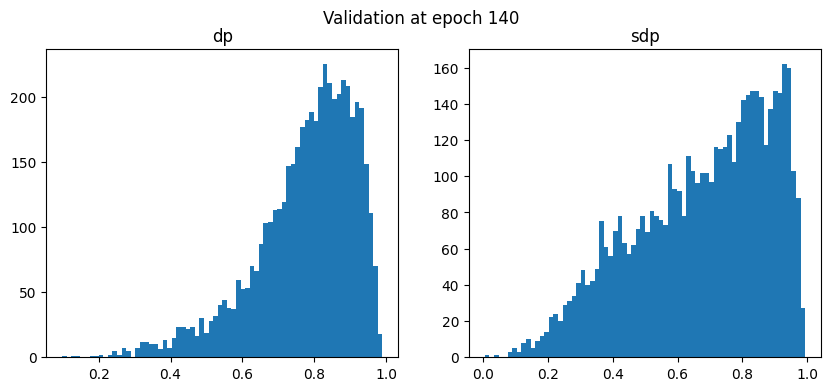

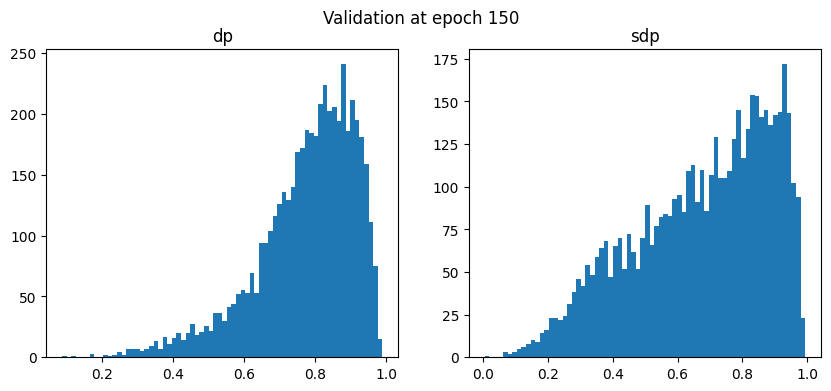

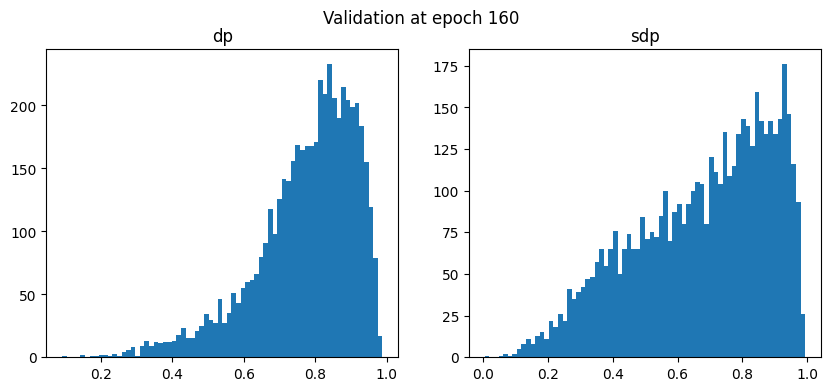

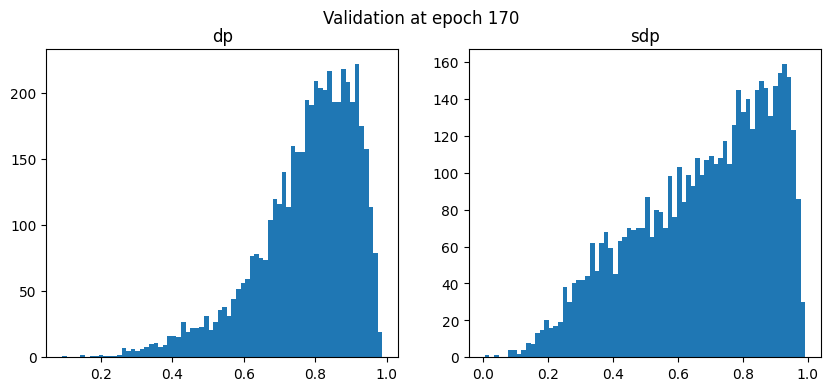

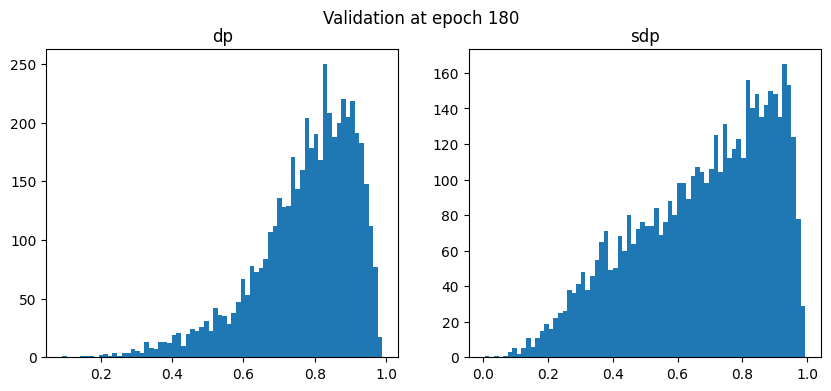

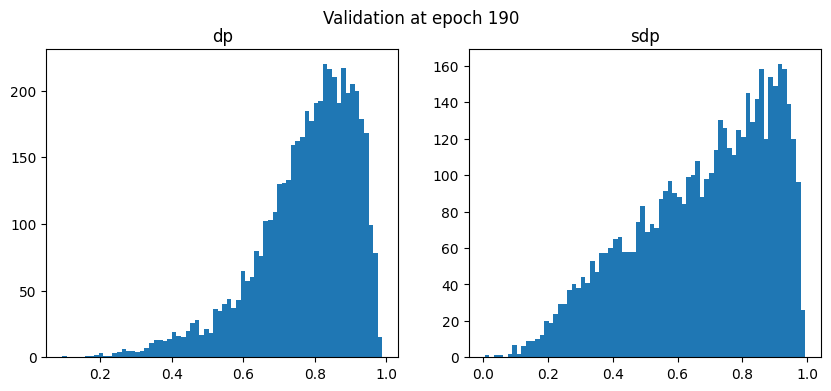

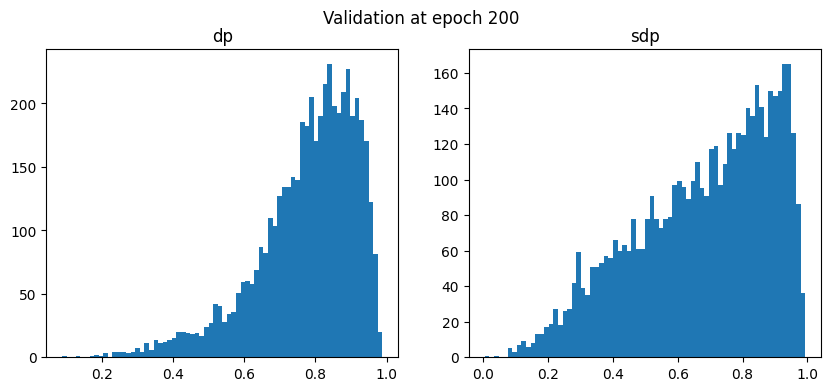

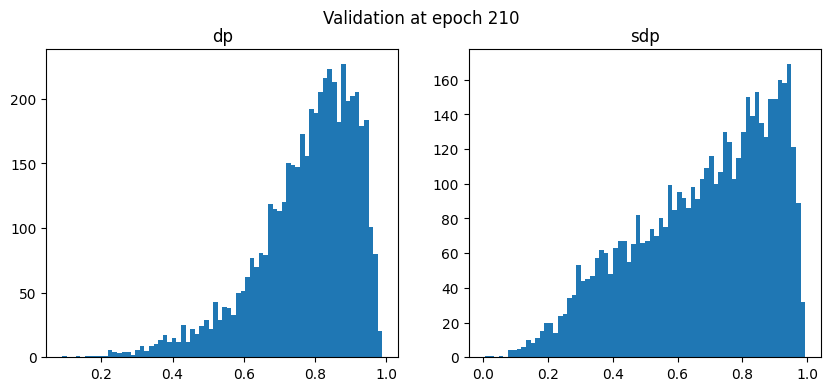

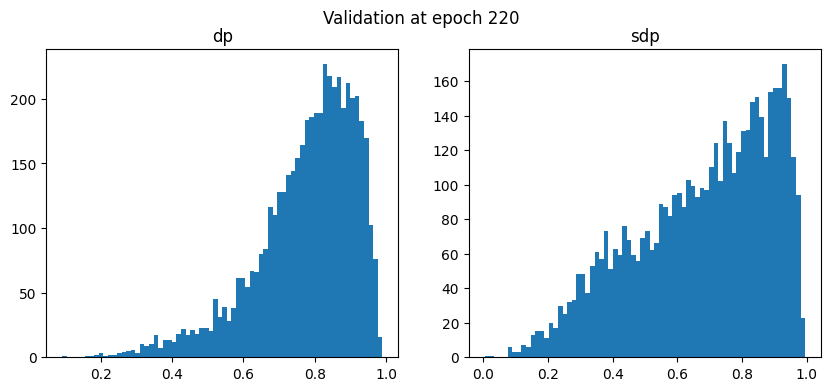

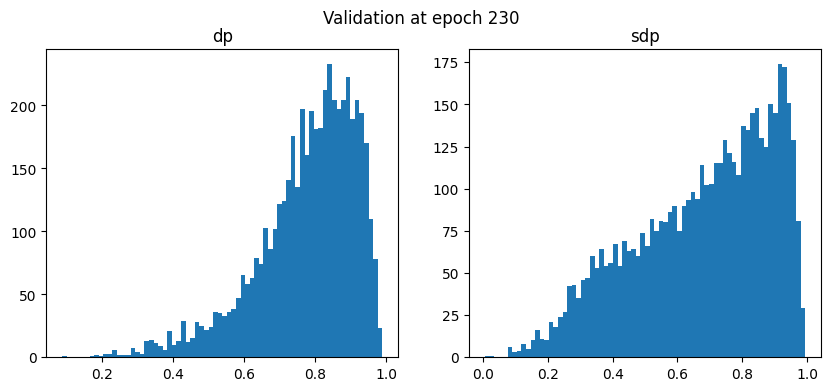

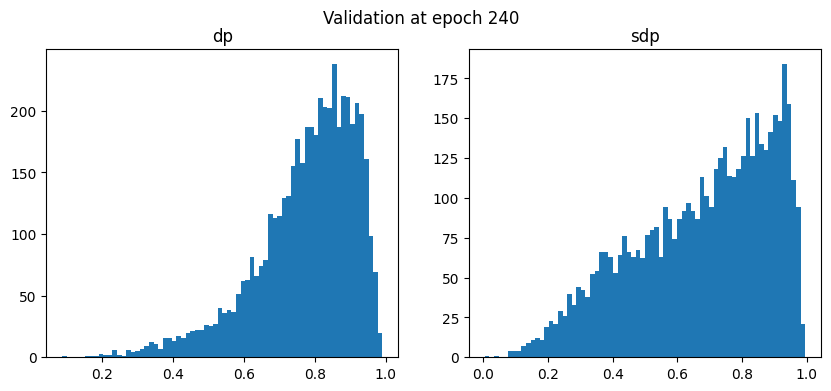

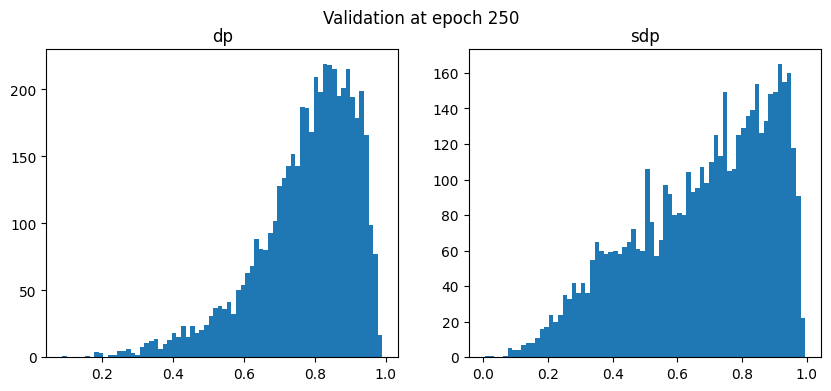

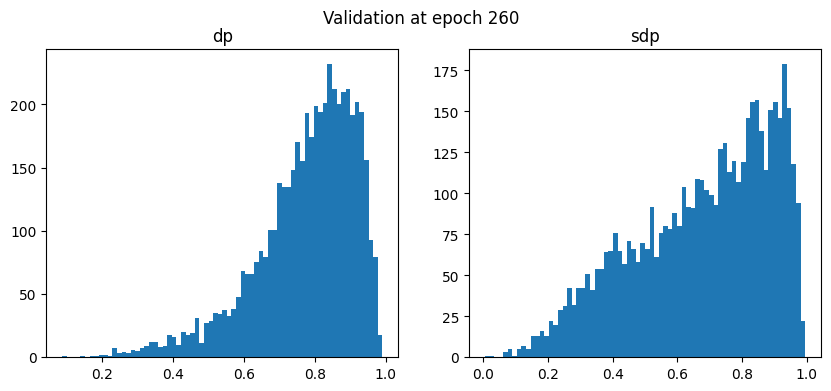

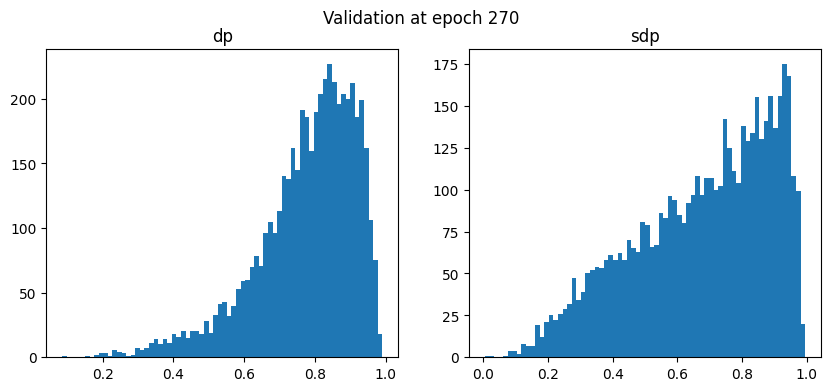

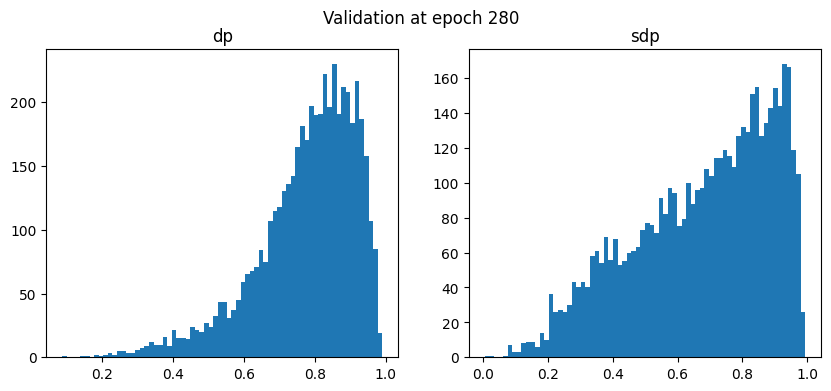

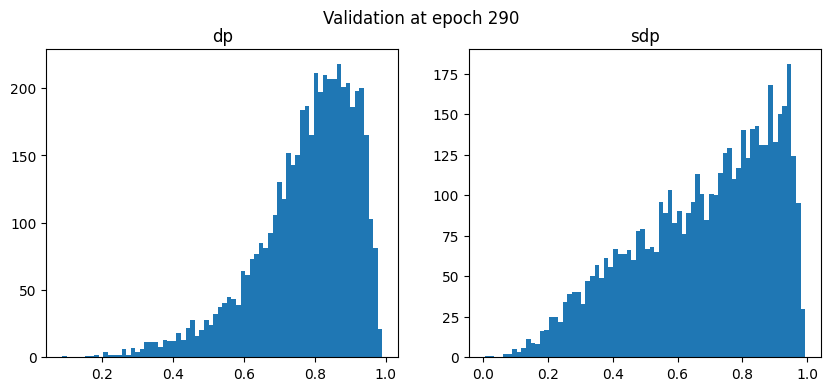

In [ ]:
validation_metrics.plot_histograms(statistics_validation)

In [ ]:
validation_metrics.print_mean_and_deviation(statistics_validation)

/content/drive/MyDrive/NIST_SMALL/GATTED_GAT_BIG/validation0.pkl
 | DotProduct mean is: 0.6513757074238626 and standard deviation is 0.15560441334210667
 | SteinDotProduct mean is: 0.5127345275040672 and standard deviation is 0.1707114746519829

/content/drive/MyDrive/NIST_SMALL/GATTED_GAT_BIG/validation10.pkl
 | DotProduct mean is: 0.7228680525598534 and standard deviation is 0.14974217613395988
 | SteinDotProduct mean is: 0.5971802388579179 and standard deviation is 0.19460470085073792

/content/drive/MyDrive/NIST_SMALL/GATTED_GAT_BIG/validation20.pkl
 | DotProduct mean is: 0.7406222191678011 and standard deviation is 0.1460526075525968
 | SteinDotProduct mean is: 0.62354191026006 and standard deviation is 0.20163168480174506

/content/drive/MyDrive/NIST_SMALL/GATTED_GAT_BIG/validation30.pkl
 | DotProduct mean is: 0.7521580379155417 and standard deviation is 0.1447343586194187
 | SteinDotProduct mean is: 0.6427717856612293 and standard deviation is 0.20332451532997692

/content/drive

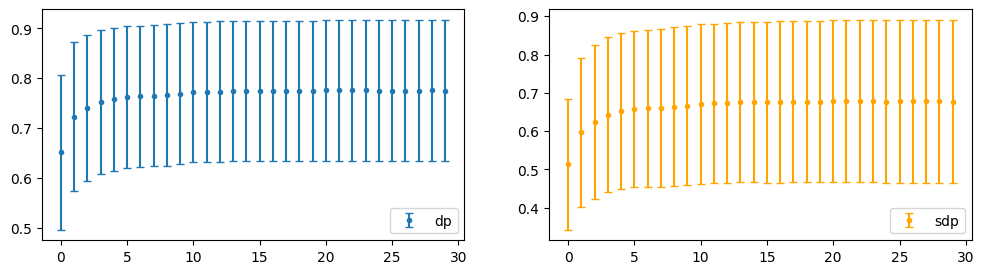

In [ ]:
validation_metrics.plot_progres_bar(statistics_validation)

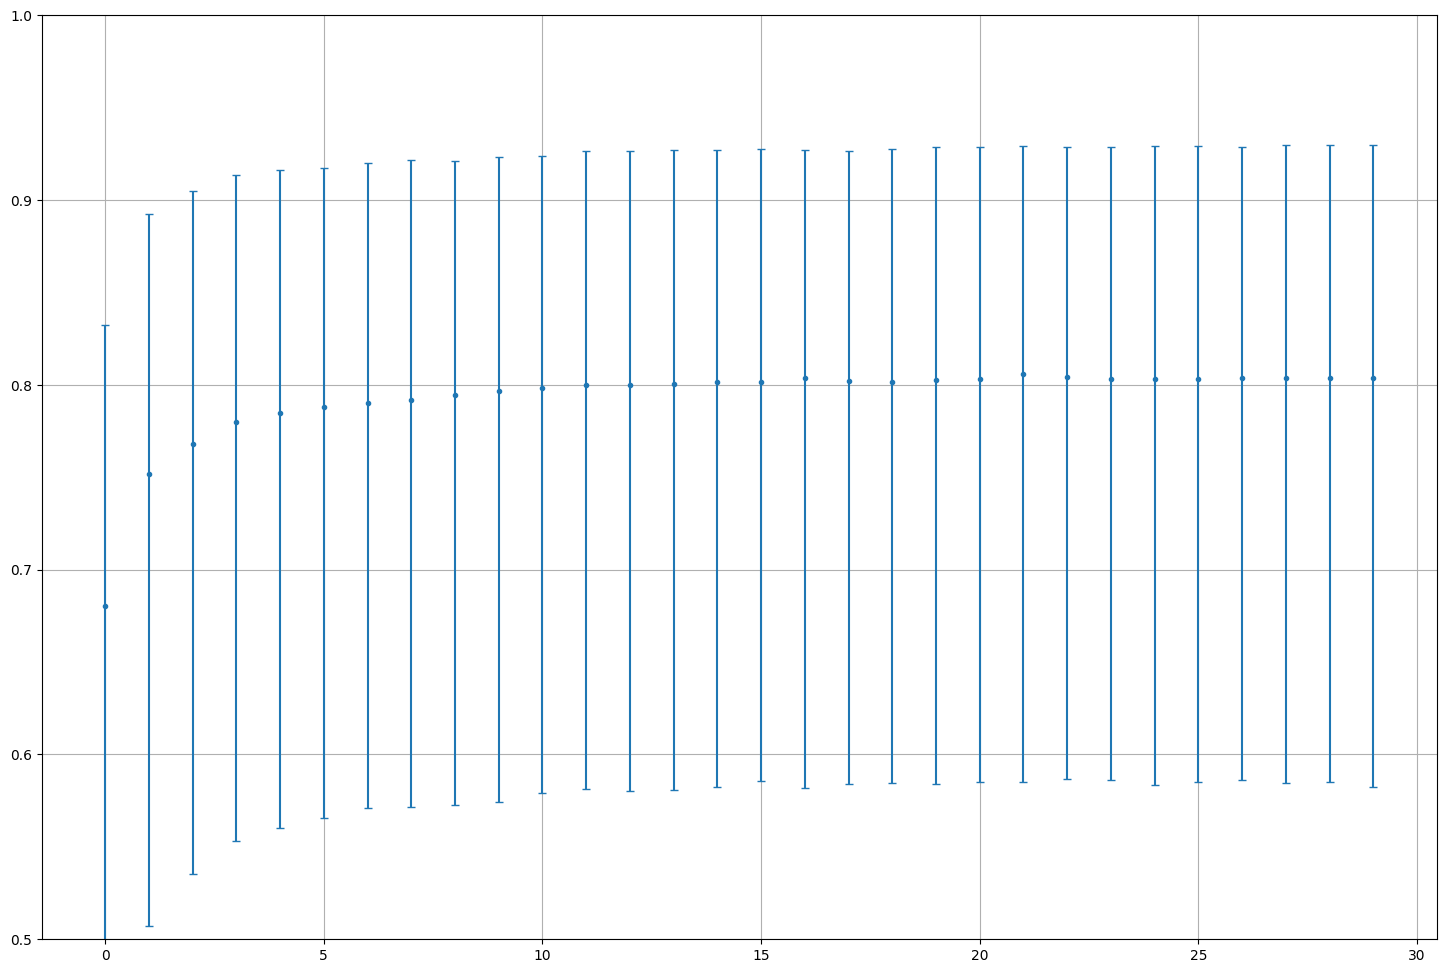

In [ ]:
validation_metrics.plot_median(statistics_validation)

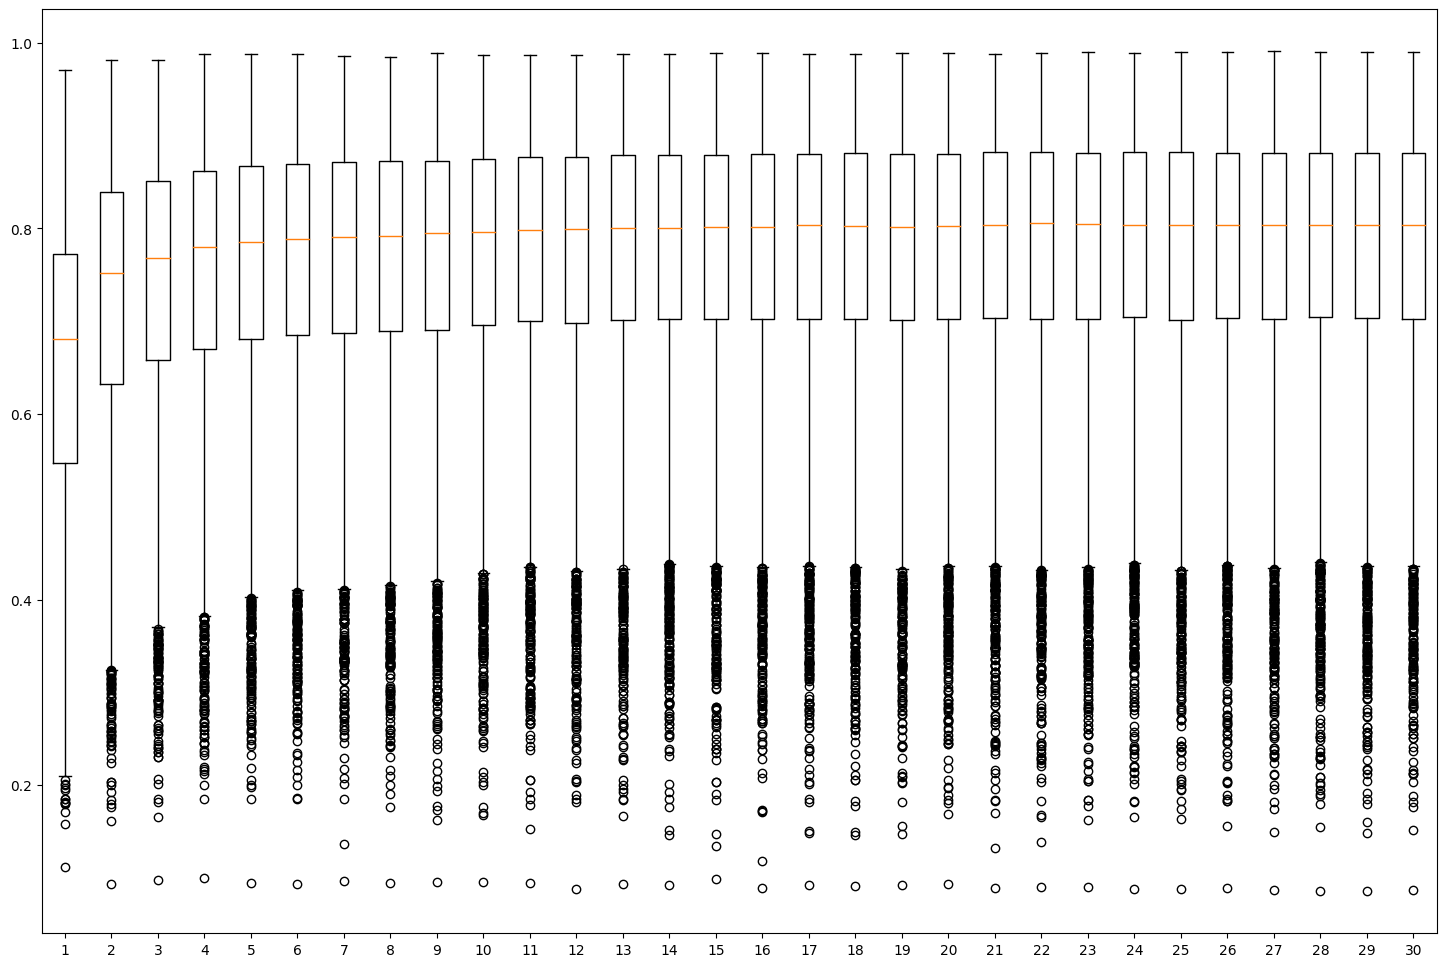

In [ ]:
validation_metrics.plot_boxplot_outliers(statistics_validation)

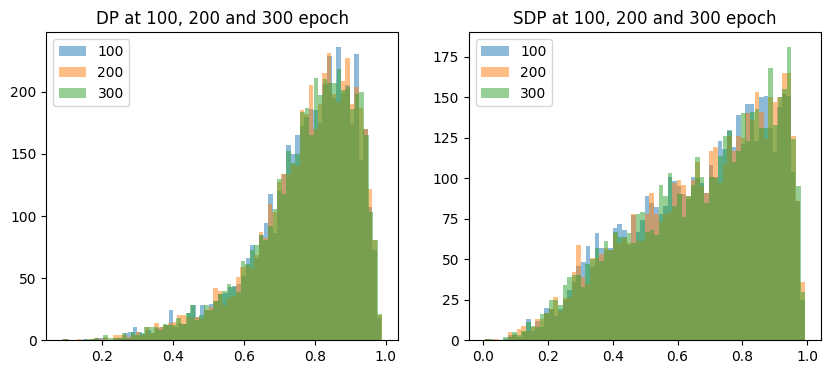

In [ ]:
validation_metrics.histograms_convolved(PATH_MODELS, statistics_validation)

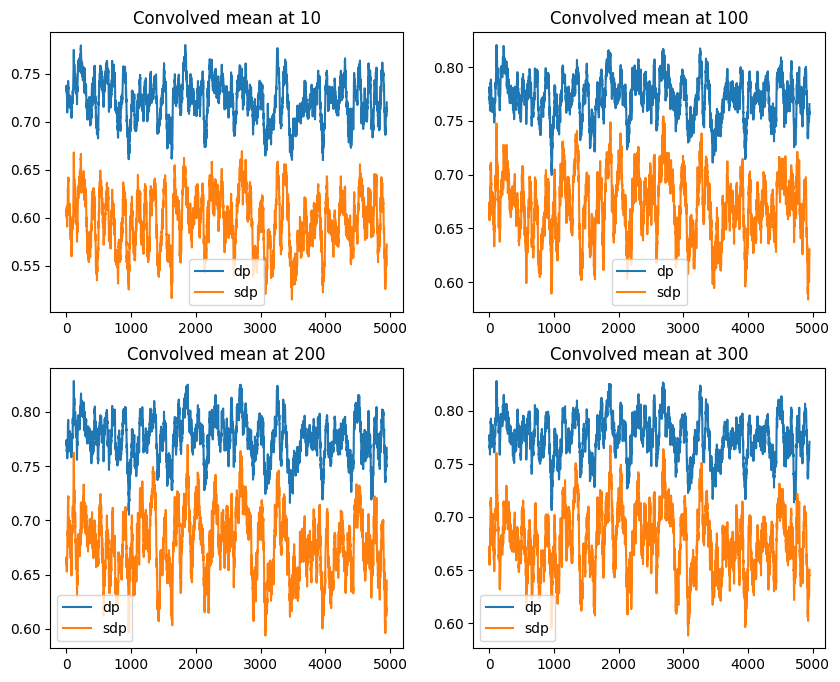

In [ ]:
validation_metrics.convolved_mean(PATH_MODELS, statistics_validation)

#TEST

In [ ]:
kernel_size = 4
number_of_gates = 2
number_of_channels = 1
heads = 4
model = model_base_big.GATTED_GAT_BIG(kernel_size, number_of_gates, number_of_channels, heads)
checkpoint = torch.load("/content/drive/MyDrive/NIST_SMALL/GATTED_GAT_BIG/290.pt", map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

GATTED_GAT_BIG(
  (initial_conv): GATConv(50, 300, heads=4)
  (skipgat1): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (skipgat2): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (skipgat3): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (skipgat4): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (mean_conv): GATConv(1200, 300, heads=4)
  (mean_relu): ReLU()
  (bottleneck): Linear(in_features=300, out_features=2000, bias=True)
  (skip1): SKIPblock(
    (batchNorm1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (hidden1): Linear

In [ ]:
matchms.set_matchms_logger_level("ERROR")

test_loader_unshuffled = DataLoader(data_list_test, 
                         batch_size=BATCH, shuffle=False)

true_list, pred_list, dp, sdp = validation_metrics.validate_dataset(test_loader_unshuffled, model)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


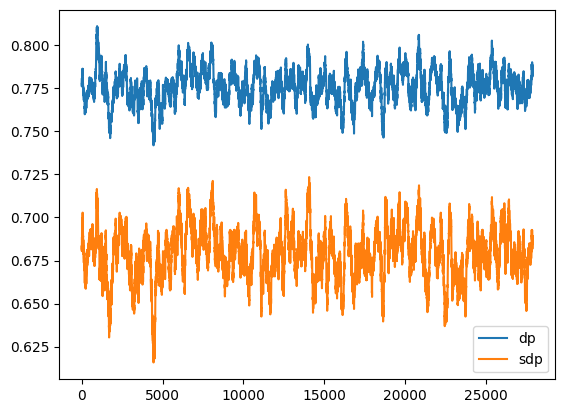

In [ ]:
win = 200
smooth_dp = np.convolve(dp, np.ones(win)/win, mode='valid')
smooth_sdp = np.convolve(sdp, np.ones(win)/win, mode='valid')

plt.plot(smooth_dp,label='dp')
plt.plot(smooth_sdp,label='sdp')
plt.legend()

plt.show()

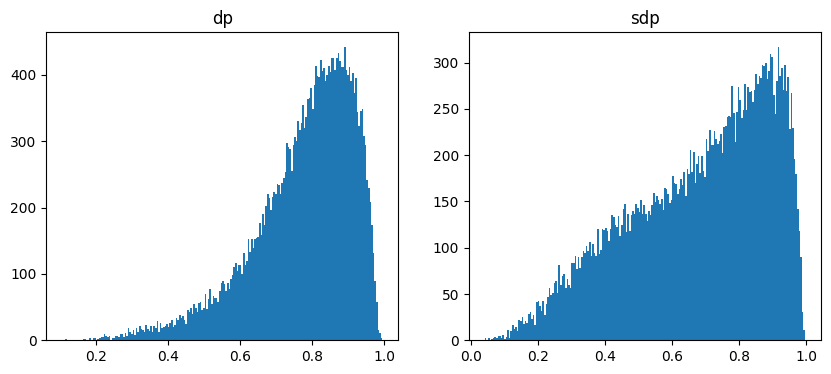

In [ ]:
bins = 200
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(dp,label='dp',bins=bins)
plt.title('dp')
plt.subplot(122)
plt.hist(sdp,label='sdp',bins=bins)
plt.title('sdp')
plt.show()

In [ ]:
print(f" | DotProduct mean is: {np.mean(dp)} and standard deviation is {np.std(dp)}")

print(f" | SteinDotProduct mean is: {np.mean(sdp)} and standard deviation is {np.std(sdp)}")

 | DotProduct mean is: 0.7759183248619607 and standard deviation is 0.1399566618647017
 | SteinDotProduct mean is: 0.6790140519854586 and standard deviation is 0.21025013879593157


In [ ]:
validation_metrics.measure_time(test_loader_unshuffled, model)